## demo_classify_data_test

In [1]:
import sys; sys.path.append("/home/shhsu/download/scClass")
import scClass
from scClass.main import Model

In [2]:
def dataset(file):
    return"../../../../scClass_dataset/1M_immune_cells/"+file

path_matrix = dataset('data_test.npz')
path_label  = dataset('data_test.csv')

In [3]:
matrix,label = scClass.read_input(matrix=path_matrix,label=path_label)

In [4]:
matrix = scClass.toTorch(matrix)
label = scClass.toTorch(label)

In [6]:
model = scClass.load(scClass.data_dir+'model_train_drop.pkl')
model

loading model from:  /home/shhsu/download/scClass/scClass/data/model_train_drop.pkl


Model(
  (out): Linear(in_features=45468, out_features=13, bias=True)
  (drop): Dropout(p=0.4, inplace=False)
  (loss_func): CrossEntropyLoss()
)

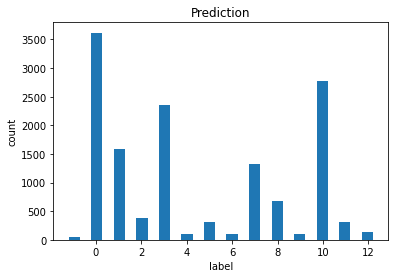

In [7]:
threshold = [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.5, 1.0, 1.0, 1.0, 1.0]
pred_y = scClass.predict_batch(matrix,model,threshold=threshold)

In [7]:
# scClass.save_predict(pred_y)

## Compare prediction with true_label(if no true_label, then skip)

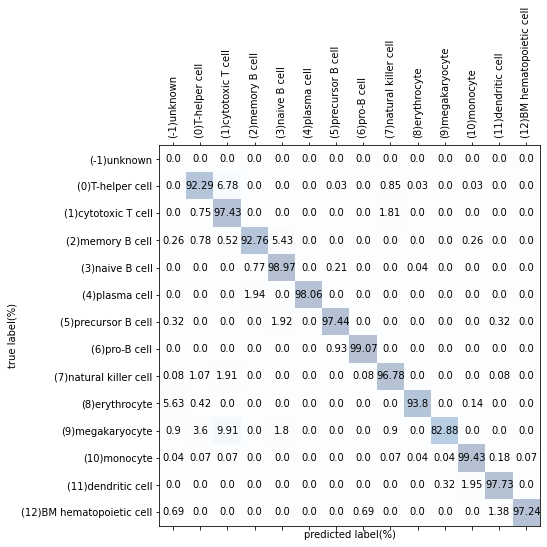

In [8]:
scClass.confusion_matrix(y_pred=pred_y,y_true=label)